# DATA2 -  Random Frorests - long


**Resources**
1. DATA
    1. [data/data2](https://github.com/MMIV-ML/MCI-subgroups/tree/master/data/data2) - csv files downloaded from ADNI,
    1. [data/data2_FS](https://github.com/MMIV-ML/MCI-subgroups/tree/master/data/data2_FS) - FS result csv files,
    1. [data_zip/20201109_data2_file_versions](https://github.com/MMIV-ML/MCI-subgroups/blob/master/data/data_zip/20201109_data2_file_versions.pdf) - download ADNI web page screen shoot taken for downaloaded csv files (some of file neames are printed with dates),
1. RESULTS
    1. [results/20210114](https://github.com/MMIV-ML/MCI-subgroups/tree/master/results/20210114) - result folder,
    1. [results/20210114/README.md](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20210114/README.md) - short description,
1. GOOGLE DRIVE
    1. [slides](https://docs.google.com/presentation/d/1aEK7M5BPe0RxWYskzQCEDbT4Mf-4mRRqQ5uJ_YuqRzg/edit#slide=id.p) - link to google slides (**OUT OF DATE, MUST BE UPDATED !!!**),
    1. [GoogleDrive](https://drive.google.com/drive/folders/1r8l2R88-0T8Xahk30iAgjBCWXvV1R2J-) - main google drive slide folder,
1. GIT HUB
    1. [GitHub](https://github.com/MMIV-ML/MCI-subgroups) - main repo folder,
1. FEATURES
    1. Included features ([local](../results/20201110/features_included.csv), [GitHub](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20201110/features_included.csv)) - a file with a feature list included in each subproject (sMCI-cAD, baseline) 
    1. Features to include ([local](../results/20201110/features_to_include.csv), [GitHub](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20201110/features_to_include.csv))- a least of featrues from different csv files to combine with ADNIMERGE  





The latest changes (ver. 0.01):

    - root file

   *Created: 2021.04.08 / Updated: 2021.04.08*
   
---

#### IMPORTS

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pdpbox import pdp
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display

In [3]:
import mci_info as minfo
import mci_utils as mutils

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

#### GLOBAL VARIABLES

In [5]:
# Notebook folder
NB_DIR = %pwd
NB_DIR = Path(NB_DIR)
# Root MCI foler
ROOT_DIR = NB_DIR.parent
# Main data folder (with downloaded csv files)
MAIN_DATA_DIR = ROOT_DIR/'data/data2'
DATA_DIR_FS = ROOT_DIR / 'data/data2_FS'
# Current data dir with sMCI_cAD.csv & bl.csv files
CURRENT_DATA_DIR = ROOT_DIR/'results/20201110'
# Results folder
RESULTS_DIR = ROOT_DIR/'results/20210404'
#RESULTS_DIR.mkdir(parents=True, exist_ok=True)

### INSTALLED PACKAGES INFO

In [6]:
if 1:
    packages = ['numpy', 'scipy', 'seaborn', 'pandas', 'matplotlib', 'statsmodels', 'ipywidgets', 'eli5', 'pdpbox']
    display(mutils.package_versions(installedOnly=False, theMostImportant=packages))



Computer name: mk-prec-7540
Operating system: Linux, 64bit

Python path: /home/marek/miniconda3/envs/py37/bin/python
Python version: 3.7.7 (default, Mar 26 2020, 15:48:22) 
[GCC 7.3.0]



,module,version
4,eli5,0.11.0
6,ipywidgets,7.6.2
9,matplotlib,3.3.4
11,numpy,1.19.2
13,pandas,1.1.5
14,pdpbox,0.2.1
18,scipy,1.5.2
19,seaborn,0.11.1
22,statsmodels,0.11.1


---

# (L+R)LV_normalized

In [7]:
lrlv_name = RESULTS_DIR / 'LRLV_n_long_lmem_features.csv'
lrlv = pd.read_csv(lrlv_name, index_col=0)

print(f'Rows: \t{lrlv.shape[0]}')

Rows: 	560


### COUNT SUBGROUP ELEMENTS

In [8]:
lrlv.Subgroup_.value_counts()

sMCI    300
cAD     260
Name: Subgroup_, dtype: int64

In [9]:
minfo.included_feature_info(lrlv, pattern='adni-adas-neuro-gds-cross-long-_')

Total number of columns: 13



,adni (#2),adas (#0),neuro (#0),gds (#0),long (#0),cross (#0),ours (#11)
0,PTID,,,,,,Age_at_scan_
1,RID,,,,,,Participation_length_yr_
2,,,,,,,Score_name_
3,,,,,,,Subgroup_
4,,,,,,,lrlv_n_long_d_slope_
5,,,,,,,lrlv_n_long_dev_
6,,,,,,,lrlv_n_long_fixed_i_
7,,,,,,,lrlv_n_long_fixed_s_
8,,,,,,,lrlv_n_long_mixed_s_
9,,,,,,,lrlv_n_long_random_i_


---

# ADAS13

In [10]:
adas_name = RESULTS_DIR / 'ADAS13_adni_lmem_features.csv'
adas = pd.read_csv(adas_name, index_col=0)

print(f'Rows: \t{adas.shape[0]}')

Rows: 	566


### COUNT SUBGROUP ELEMENTS

In [11]:
adas.Subgroup_.value_counts()

sMCI    305
cAD     261
Name: Subgroup_, dtype: int64

In [12]:
minfo.included_feature_info(adas, pattern='adni-adas-neuro-gds-cross-long-_')

Total number of columns: 13



,adni (#2),adas (#0),neuro (#0),gds (#0),long (#0),cross (#0),ours (#11)
0,PTID,,,,,,Age_at_scan_
1,RID,,,,,,Participation_length_yr_
2,,,,,,,Score_name_
3,,,,,,,Subgroup_
4,,,,,,,adas13_adni_d_slope_
5,,,,,,,adas13_adni_dev_
6,,,,,,,adas13_adni_fixed_i_
7,,,,,,,adas13_adni_fixed_s_
8,,,,,,,adas13_adni_mixed_s_
9,,,,,,,adas13_adni_random_i_


---

# LINKING TABLES

In [13]:
cols = ['RID', 'lrlv_n_long_random_s_', 'lrlv_n_long_d_slope_', 'lrlv_n_long_dev_' ,'lrlv_n_long_mixed_s_']
df =  pd.merge(adas, lrlv[cols], how='left', on=['RID'] )
print(df.shape)
display(df.head(2))
display(df.tail(2))

(566, 17)


,RID,PTID,Subgroup_,Score_name_,Age_at_scan_,Participation_length_yr_,adas13_adni_fixed_i_,adas13_adni_fixed_s_,adas13_adni_random_i_,adas13_adni_random_s_,adas13_adni_mixed_s_,adas13_adni_d_slope_,adas13_adni_dev_,lrlv_n_long_random_s_,lrlv_n_long_d_slope_,lrlv_n_long_dev_,lrlv_n_long_mixed_s_
0,4,022_S_0004,sMCI,ADAS13_adni,67.5,3.02806,-107.260169,1.691205,55.553318,-0.586578,1.104627,1.211997,15.959336,0.000088,0.001126,0.005147,0.001622
1,30,023_S_0030,cAD,ADAS13_adni,80.0,3.10198,-107.260169,1.691205,-65.884284,0.772652,2.463856,4.190872,-4.072141,-0.000325,0.001313,-0.023179,0.001209


,RID,PTID,Subgroup_,Score_name_,Age_at_scan_,Participation_length_yr_,adas13_adni_fixed_i_,adas13_adni_fixed_s_,adas13_adni_random_i_,adas13_adni_random_s_,adas13_adni_mixed_s_,adas13_adni_d_slope_,adas13_adni_dev_,lrlv_n_long_random_s_,lrlv_n_long_d_slope_,lrlv_n_long_dev_,lrlv_n_long_mixed_s_
564,5066,128_S_5066,sMCI,ADAS13_adni,79.7,3.02259,-107.260169,1.691205,137.460123,-1.867384,-0.176180,-1.65421,-11.370395,-0.000092,0.000772,-0.006492,0.001443
565,5099,021_S_5099,sMCI,ADAS13_adni,61.6,1.97673,-107.260169,1.691205,95.141768,-1.243357,0.447848,0.00000,18.550978,-0.000002,-0.000024,-0.000124,0.001532


---

# FIND NaN AND REMOVE THEM

In [14]:
df.isna().sum()

RID                         0
PTID                        0
Subgroup_                   0
Score_name_                 0
Age_at_scan_                0
Participation_length_yr_    0
adas13_adni_fixed_i_        0
adas13_adni_fixed_s_        0
adas13_adni_random_i_       0
adas13_adni_random_s_       0
adas13_adni_mixed_s_        0
adas13_adni_d_slope_        0
adas13_adni_dev_            0
lrlv_n_long_random_s_       6
lrlv_n_long_d_slope_        7
lrlv_n_long_dev_            6
lrlv_n_long_mixed_s_        6
dtype: int64

In [15]:
df = df.dropna()
print(df.shape)
df.head(2)

(559, 17)


,RID,PTID,Subgroup_,Score_name_,Age_at_scan_,Participation_length_yr_,adas13_adni_fixed_i_,adas13_adni_fixed_s_,adas13_adni_random_i_,adas13_adni_random_s_,adas13_adni_mixed_s_,adas13_adni_d_slope_,adas13_adni_dev_,lrlv_n_long_random_s_,lrlv_n_long_d_slope_,lrlv_n_long_dev_,lrlv_n_long_mixed_s_
0,4,022_S_0004,sMCI,ADAS13_adni,67.5,3.02806,-107.260169,1.691205,55.553318,-0.586578,1.104627,1.211997,15.959336,0.000088,0.001126,0.005147,0.001622
1,30,023_S_0030,cAD,ADAS13_adni,80.0,3.10198,-107.260169,1.691205,-65.884284,0.772652,2.463856,4.190872,-4.072141,-0.000325,0.001313,-0.023179,0.001209


In [16]:
df.isna().sum()

RID                         0
PTID                        0
Subgroup_                   0
Score_name_                 0
Age_at_scan_                0
Participation_length_yr_    0
adas13_adni_fixed_i_        0
adas13_adni_fixed_s_        0
adas13_adni_random_i_       0
adas13_adni_random_s_       0
adas13_adni_mixed_s_        0
adas13_adni_d_slope_        0
adas13_adni_dev_            0
lrlv_n_long_random_s_       0
lrlv_n_long_d_slope_        0
lrlv_n_long_dev_            0
lrlv_n_long_mixed_s_        0
dtype: int64

---

# STATS

In [17]:
pd.DataFrame.from_dict({'min':df.min(), 'mean':df.mean(), 'max':df.max()})

,min,mean,max
Age_at_scan_,55,7.344454e+01,91.4
PTID,002_S_0729,NaN,941_S_4764
Participation_length_yr_,0.481862,4.277782e+00,12.9884
RID,4,2.402889e+03,5099
Score_name_,ADAS13_adni,NaN,ADAS13_adni
Subgroup_,cAD,NaN,sMCI
adas13_adni_d_slope_,-13.3861,2.340492e+00,63.0144
adas13_adni_dev_,-34.4377,-8.186420e-02,48.0627
adas13_adni_fixed_i_,-107.26,-1.072602e+02,-107.26
adas13_adni_fixed_s_,1.6912,1.691205e+00,1.6912


---

# CODING SUBGROUPS NAMES TO INT VALUES

In [18]:
df.loc[df.Subgroup_ == 'sMCI', 'Subgroup_b_'] = 0
df.loc[df.Subgroup_ == 'cAD', 'Subgroup_b_'] = 1
df['Subgroup_b_'] = df.Subgroup_b_.astype(int)
df.head(2)

,RID,PTID,Subgroup_,Score_name_,Age_at_scan_,Participation_length_yr_,adas13_adni_fixed_i_,adas13_adni_fixed_s_,adas13_adni_random_i_,adas13_adni_random_s_,adas13_adni_mixed_s_,adas13_adni_d_slope_,adas13_adni_dev_,lrlv_n_long_random_s_,lrlv_n_long_d_slope_,lrlv_n_long_dev_,lrlv_n_long_mixed_s_,Subgroup_b_
0,4,022_S_0004,sMCI,ADAS13_adni,67.5,3.02806,-107.260169,1.691205,55.553318,-0.586578,1.104627,1.211997,15.959336,0.000088,0.001126,0.005147,0.001622,0
1,30,023_S_0030,cAD,ADAS13_adni,80.0,3.10198,-107.260169,1.691205,-65.884284,0.772652,2.463856,4.190872,-4.072141,-0.000325,0.001313,-0.023179,0.001209,1


---

# CREATE X AND y

In [19]:
X = df.drop(labels=['RID','PTID','Score_name_', 'Subgroup_', 'Subgroup_b_'], axis=1)
X = X.drop(labels=['adas13_adni_fixed_i_', 'adas13_adni_random_i_',  'adas13_adni_fixed_s_', 'adas13_adni_mixed_s_', 'lrlv_n_long_mixed_s_'], axis=1)
y = df['Subgroup_b_']

In [20]:
minfo.included_feature_info(X, pattern='adni-adas-neuro-gds-cross-long-_')

Total number of columns: 8



,adni (#0),adas (#0),neuro (#0),gds (#0),long (#0),cross (#0),ours (#8)
0,,,,,,,Age_at_scan_
1,,,,,,,Participation_length_yr_
2,,,,,,,adas13_adni_d_slope_
3,,,,,,,adas13_adni_dev_
4,,,,,,,adas13_adni_random_s_
5,,,,,,,lrlv_n_long_d_slope_
6,,,,,,,lrlv_n_long_dev_
7,,,,,,,lrlv_n_long_random_s_


---

##### REMOVE THE TARGET (`SUBGROUP_`) COLUMN FROM THE TRAIN SET

In [21]:
if 'Subgroup_' in X.columns:
    X = X.drop(columns='Subgroup_')
"Subgroup_" in X.columns

False

In [22]:
X.shape, y.shape

((559, 8), (559,))

### FEATURE STANDARIZATION IN THE TRAIN SET

In [23]:
# Standarization
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_test = scaler.transform(X_test)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
display(X.head())
display(X_scaled.head())

,Age_at_scan_,Participation_length_yr_,adas13_adni_random_s_,adas13_adni_d_slope_,adas13_adni_dev_,lrlv_n_long_random_s_,lrlv_n_long_d_slope_,lrlv_n_long_dev_
0,67.5,3.028060,-0.586578,1.211997,15.959336,0.000088,0.001126,0.005147
1,80.0,3.101980,0.772652,4.190872,-4.072141,-0.000325,0.001313,-0.023179
2,83.3,3.085560,-0.171314,2.051491,-6.652504,-0.000313,0.001467,-0.023350
3,76.8,0.977413,-0.833991,-4.430062,-7.325465,-0.000191,0.000890,-0.012989
4,70.9,4.167010,1.484995,3.201336,13.183691,0.000042,0.002246,0.002613


,Age_at_scan_,Participation_length_yr_,adas13_adni_random_s_,adas13_adni_d_slope_,adas13_adni_dev_,lrlv_n_long_random_s_,lrlv_n_long_d_slope_,lrlv_n_long_dev_
0,-0.816743,-0.492952,-0.355424,-0.257553,1.246394,0.424779,-0.396105,0.439746
1,0.900681,-0.463795,0.463558,0.422307,-0.310043,-1.578945,-0.270186,-1.700916
2,1.354081,-0.470272,-0.105213,-0.065958,-0.510536,-1.520127,-0.167196,-1.713810
3,0.461020,-1.301830,-0.504499,-1.545225,-0.562825,-0.926571,-0.554646,-0.930879
4,-0.349604,-0.043694,0.892769,0.196468,1.030728,0.204010,0.356373,0.248186


In [25]:
pd.DataFrame.from_dict({'X_mean':X.mean().round(2), 'X_std':X.std().round(2), 
                        'X_scaled_mean':X_scaled.mean().round(2), 'X_scaled_std':X_scaled.std().round(2)})

,X_mean,X_std,X_scaled_mean,X_scaled_std
Age_at_scan_,73.44,7.28,-0.0,1.0
Participation_length_yr_,4.28,2.54,0.0,1.0
adas13_adni_random_s_,0.00,1.66,0.0,1.0
adas13_adni_d_slope_,2.34,4.39,-0.0,1.0
adas13_adni_dev_,-0.08,12.88,0.0,1.0
lrlv_n_long_random_s_,0.00,0.00,-0.0,1.0
lrlv_n_long_d_slope_,0.00,0.00,0.0,1.0
lrlv_n_long_dev_,-0.00,0.01,0.0,1.0


In [26]:
# y = y.to_frame(name='Subgroup_')
# y[y=='sMCI'] = 0
# y[y=='cAD'] = 1

In [27]:
# y.loc[y.Subgroup_ == 'sMCI', 'Subgroup_b_'] = 0
# y.loc[y.Subgroup_ == 'cAD', 'Subgroup_b_'] = 1
# y['Subgroup_b_'] = y.Subgroup_b_.astype(int)
# y.head(8)

In [28]:
# y_b = y.map({'cAD': 1, 'sMCI': 0}).astype(int)
# print(type(y_b))
# y_b.value_counts()

In [29]:
#from sklearn.utils.multiclass import type_of_target
#type_of_target(y)

In [30]:
y_b = y.copy()

## RF CLASSIFIER

In [31]:
folds = 10
skf = StratifiedKFold(n_splits=folds)
clf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=4)

score = pd.DataFrame(index=[ 'f1', 'acc', 'recall', 'prec'], columns=list(range(folds)))
conf_matrix_all = np.zeros((folds, 2 ,2))

df_err_predictions = pd.DataFrame()

In [32]:
for k, (train_index, validation_index) in enumerate(skf.split(X_scaled, y_b)):
    #print("TRAIN:", train_index.shape, "VAL:", test_index.shape)
    X_train, X_validation = X_scaled.iloc[train_index,:], X_scaled.iloc[validation_index,:]
    y_train, y_validation = y_b.iloc[train_index], y_b.iloc[validation_index]
        
    # model fit
    clf.fit(X_train, y_train)

    # predict
    y_pred = clf.predict(X_validation).reshape(-1,)
    
    # metrics
    f1 = metrics.f1_score(y_validation, y_pred)
    acc = metrics.accuracy_score(y_validation, y_pred)
    recall = metrics.recall_score(y_validation, y_pred)
    prec = metrics.precision_score(y_validation, y_pred)
    conf_matrix_all[k, :, :]  = metrics.confusion_matrix(y_validation, y_pred)
    
    score[k] = [f1, acc, recall, prec]
    
    # add predictions and misclassifications to the training set
    X_validation_extended = X_validation.copy()
    X_validation_extended['y_validation'] = np.where(y_validation == 1, 'cAD', 'sMCI')
    X_validation_extended['y_pred'] = np.where(y_pred == 1, 'cAD', 'sMCI')
    X_validation_extended['KFold'] = k
    err = X_validation_extended.loc[(X_validation_extended.y_validation != X_validation_extended.y_pred)]

    df_err_predictions = pd.concat([df_err_predictions, err], axis=0)
    print(f'fold: {k}, errors: {err.shape[0]}/{y_validation.shape[0]}  ({err.shape[0]/y_validation.shape[0]*100 :.1f}%)')

fold: 0, errors: 13/56  (23.2%)
fold: 1, errors: 20/56  (35.7%)
fold: 2, errors: 13/56  (23.2%)
fold: 3, errors: 15/56  (26.8%)
fold: 4, errors: 5/56  (8.9%)
fold: 5, errors: 10/56  (17.9%)
fold: 6, errors: 10/56  (17.9%)
fold: 7, errors: 10/56  (17.9%)
fold: 8, errors: 14/56  (25.0%)
fold: 9, errors: 14/55  (25.5%)


## WRONGLY PREDICTED CASES

In [33]:
minfo.iterate_patient_GUI(df_err_predictions, column='KFold')

In [34]:
X_validation.shape, y_pred.shape, y_validation.shape

((55, 8), (55,), (55,))

### CONFUSION MATRIX

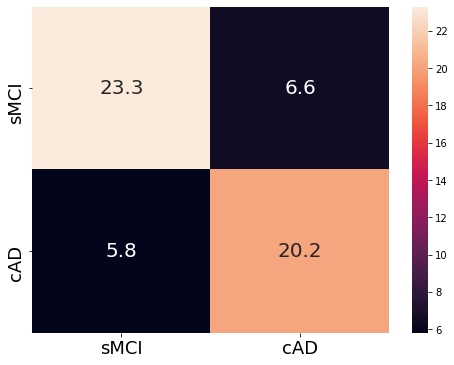

In [35]:
conf_mat_mean = conf_matrix_all.mean(axis=0)

fig, ax = plt.subplots(figsize=(8,6))
lab = ['sMCI', 'cAD']
sns.heatmap(conf_mat_mean, annot=True, xticklabels=lab, yticklabels=lab, ax=ax,annot_kws={"fontsize":20}, fmt='.1f')
ax.tick_params(axis='both', which='major', labelsize=18)

In [36]:
display(score)
score_stats = pd.DataFrame.from_dict({'mean':score.mean(axis=1).round(2), 'std.':score.std(axis=1).round(2)})
display(score_stats)

,0,1,2,3,4,5,6,7,8,9
f1,0.745098,0.600000,0.779661,0.727273,0.901961,0.807692,0.791667,0.800000,0.740741,0.758621
acc,0.767857,0.642857,0.767857,0.732143,0.910714,0.821429,0.821429,0.821429,0.750000,0.745455
recall,0.730769,0.576923,0.884615,0.769231,0.884615,0.807692,0.730769,0.769231,0.769231,0.846154
prec,0.760000,0.625000,0.696970,0.689655,0.920000,0.807692,0.863636,0.833333,0.714286,0.687500


,mean,std.
f1,0.77,0.08
acc,0.78,0.07
recall,0.78,0.09
prec,0.76,0.09


In [37]:
{(i,c) for i,c in enumerate(X_scaled.columns)}

{(0, 'Age_at_scan_'),
 (1, 'Participation_length_yr_'),
 (2, 'adas13_adni_random_s_'),
 (3, 'adas13_adni_d_slope_'),
 (4, 'adas13_adni_dev_'),
 (5, 'lrlv_n_long_random_s_'),
 (6, 'lrlv_n_long_d_slope_'),
 (7, 'lrlv_n_long_dev_')}

#### CORELATION

<AxesSubplot:>

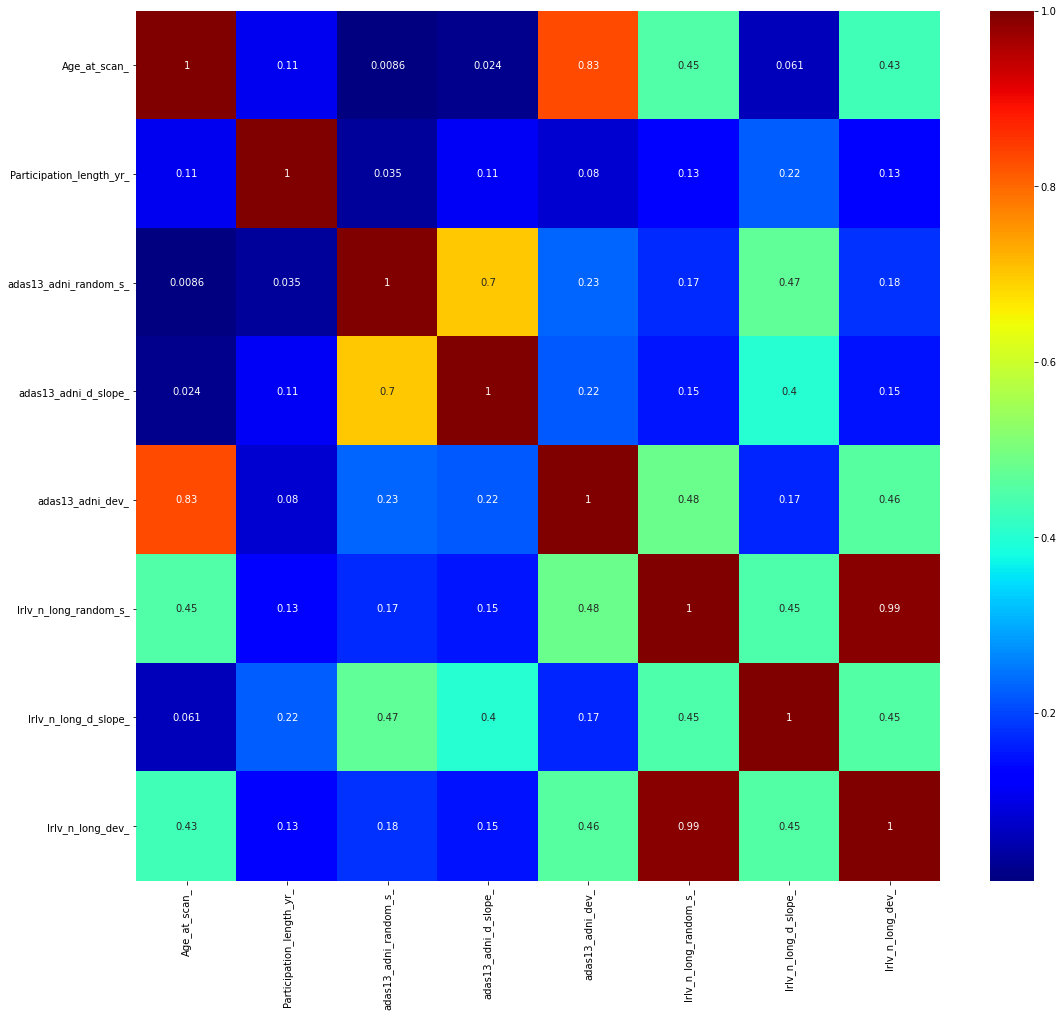

In [38]:
cor = X_scaled.corr().abs()
plt.figure(figsize=(18,16))
sns.heatmap(cor, annot=True, cmap='jet')

## VISUALIZATION

In [39]:
#https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
# Extract single tree
estimator = clf.estimators_[2]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_scaled.columns,
                class_names = ['sMCi','cAD'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

#### REMOVE TEMPORARY `tree.png` and `tree.dot` FILES FROM THE CURRENT FOLDER

In [40]:
if 1:
    [f.unlink() for f in list(Path('.').glob("tree.*"))]

## FEATURE IMPORTANCE

In [41]:
feature_imp = pd.Series(clf.feature_importances_,index=X_scaled.columns).sort_values(ascending=False)
feature_imp

adas13_adni_d_slope_        0.379065
adas13_adni_random_s_       0.250859
lrlv_n_long_d_slope_        0.154843
adas13_adni_dev_            0.070861
lrlv_n_long_dev_            0.053196
Age_at_scan_                0.036976
Participation_length_yr_    0.032012
lrlv_n_long_random_s_       0.022188
dtype: float64

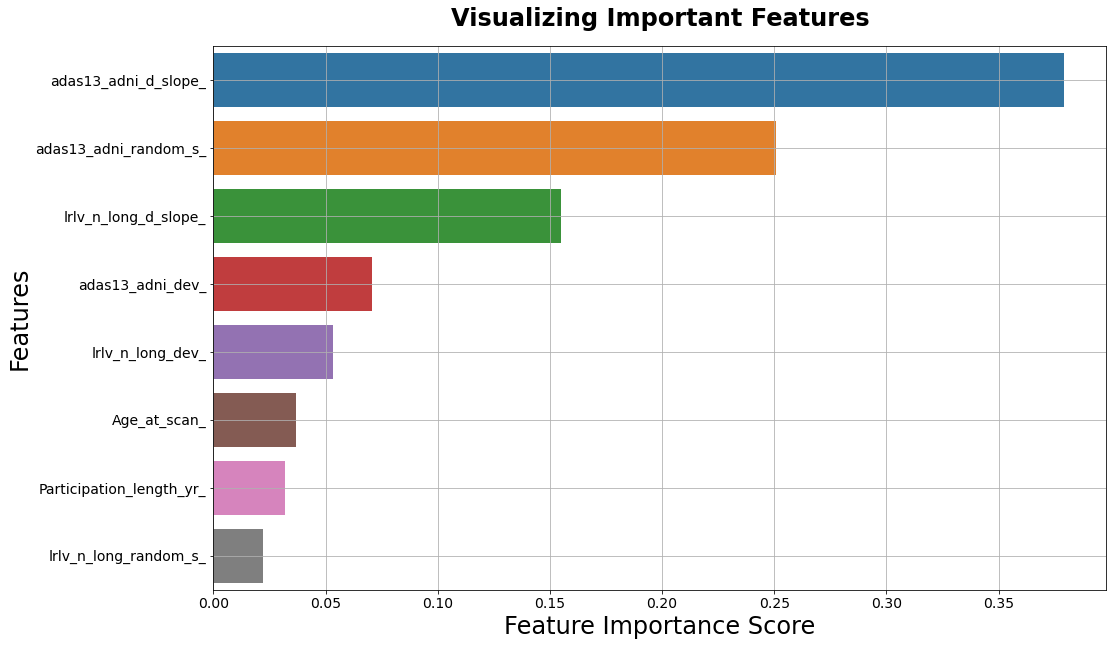

In [42]:
plt.figure(figsize=(16,10))
sns.barplot(x=feature_imp, y=feature_imp.index, ci='sd')
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=24)
plt.ylabel('Features',fontsize=24)
plt.title("Visualizing Important Features", fontsize=24, fontweight='bold', pad=20)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

---

# FEATURE PERMUTATION

In [43]:
import eli5
from eli5.sklearn import PermutationImportance

In [44]:
print(X_scaled.shape)
X_scaled.isna().sum()

(559, 8)


Age_at_scan_                0
Participation_length_yr_    0
adas13_adni_random_s_       0
adas13_adni_d_slope_        0
adas13_adni_dev_            0
lrlv_n_long_random_s_       0
lrlv_n_long_d_slope_        0
lrlv_n_long_dev_            0
dtype: int64

In [45]:
clf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=4).fit(X_scaled, y_b)
perm = PermutationImportance(clf, random_state=42).fit(X_scaled, y_b)
X_scaled.head()
eli5.show_weights(perm, feature_names = X_scaled.columns.tolist())

Weight,Feature
0.1188 ± 0.0202,adas13_adni_d_slope_
0.0787 ± 0.0224,adas13_adni_random_s_
0.0229 ± 0.0109,lrlv_n_long_d_slope_
0.0140 ± 0.0053,Participation_length_yr_
0.0104 ± 0.0062,lrlv_n_long_random_s_
0.0097 ± 0.0089,Age_at_scan_
0.0079 ± 0.0049,lrlv_n_long_dev_
0.0047 ± 0.0110,adas13_adni_dev_


In [46]:
# Xr=X_scaled[['Age_at_scan_', 'adas13_adni_mixed_s_', 'lrlv_n_long_mixed_s_','adas13_adni_d_slope_', 'lrlv_n_long_d_slope_']]
# clf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=4).fit(Xr, y_b)
# perm = PermutationImportance(clf, random_state=42).fit(Xr, y_b)
# Xr.head()
# eli5.show_weights(perm, feature_names = Xr.columns.tolist())

In [47]:
# Xr=X_scaled[['AGE', 'AVDELTOT_neuro', 'RAVLT_immediate', 'AVDEL30MIN_neuro']]
# clf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=4).fit(Xr, y_b)
# perm = PermutationImportance(clf, random_state=42).fit(Xr, y_b)
# Xr.head()
# eli5.show_weights(perm, feature_names = Xr.columns.tolist())

# Partial dependece plots

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


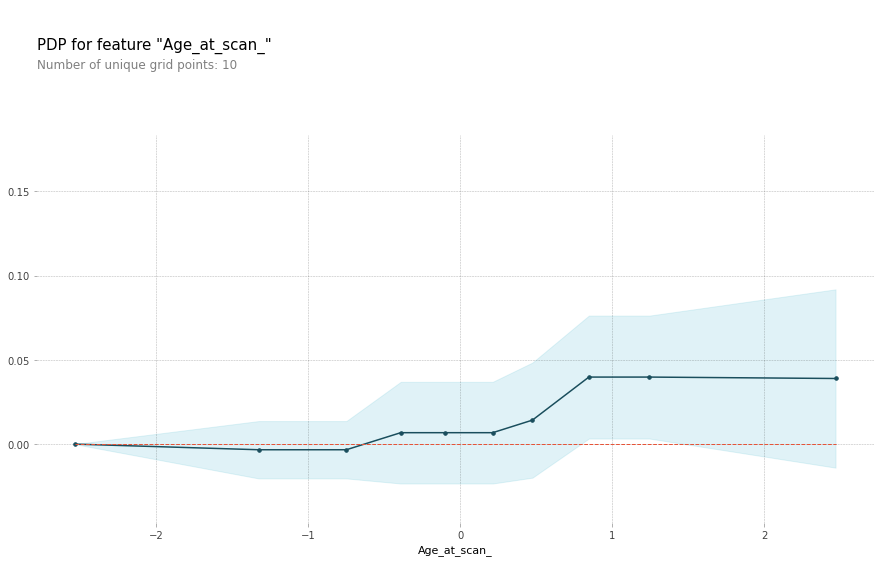

In [48]:
#Xr=X_scaled[['Age_at_scan_', 'adas13_adni_mixed_s_', 'lrlv_n_long_mixed_s_','adas13_adni_d_slope_', 'lrlv_n_long_d_slope_']]
Xr=X_scaled
pdp_goals = pdp.pdp_isolate(model=clf, dataset=Xr, model_features=Xr.columns.tolist(), feature='Age_at_scan_')
pdp.pdp_plot(pdp_goals, 'Age_at_scan_')
plt.show()

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='adas13_adni_d_slope_'>})

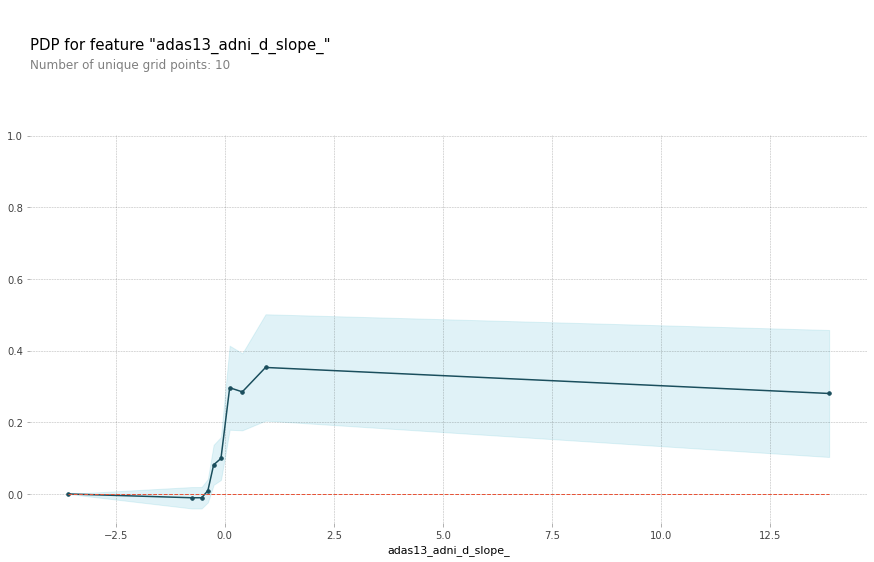

In [49]:
#Xr=X_scaled[['Age_at_scan_', 'adas13_adni_mixed_s_', 'lrlv_n_long_mixed_s_','adas13_adni_d_slope_', 'lrlv_n_long_d_slope_']]
Xr = X_scaled
pdp_goals = pdp.pdp_isolate(model=clf, dataset=Xr, model_features=Xr.columns.tolist(), feature='adas13_adni_d_slope_')
pdp.pdp_plot(pdp_goals, 'adas13_adni_d_slope_')